## Lead Score Case Study - Logistic Regression

Following steps will be taken.

1. Reading,understanding and cleaning the data
2. Data visualisation(EDA)
3. Data preparation
4. Splitting the data into train and test sets
5. Building our model
6. Model prediction and evaluation

In [848]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [849]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1- Reading and understanding the data

In [850]:
leads_data=pd.read_csv("Leads.csv")
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [851]:
leads_data.shape

(9240, 37)

In [852]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [853]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Some of the important columns in the dataset are LEAD ORIGIN,LEAD SCORES,Page Views Per Visit, City etc.

The target variable, which we want to compare across the independent variables, is CONVERTED. Our strategy is to find out patterns by comparing target vairables and above listed attributes of leads data.

## Data Cleaning

##### As per the problem statement, it is given that categorical columns have values "Select" which is nothing but NULL. So as first step we will replace "select" with np.nan

In [854]:
#before replace "Select" np.NaN in City
leads_data.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [855]:
#before replace "Select" np.NaN in Specialization
leads_data.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [856]:
#before replace "Select" np.NaN in Lead Profile
leads_data["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [857]:
#replace SELECT in categorical columns with np.NaN in whole dataframe
leads_data.replace("Select",np.NaN,inplace=True)

In [858]:
#Reverifying the column values Specialization
leads_data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [859]:
#Reverifying the column values city
leads_data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [860]:
#Reverifying the column values in Lead Profile
leads_data["Lead Profile"].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [861]:
# finding percentage of missing values in each column
round(leads_data.isnull().sum()/len(leads_data.index), 2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

Now, we are going to drop these columns from the data set.

#### Now examining the data in categorical columns to validate skewness
1. Lead Origin
2. Lead Source
3. Country
4. Specialization                                   
5. What is your current occupation
6. City

In [862]:
categorical_columns =["Lead Origin","Lead Source","Country","Specialization","What is your current occupation","City"]

for x in categorical_columns:
    print("Column - " + x)
    print("----------------------------")
    print(round(leads_data[x].value_counts()/len(leads_data[x]), 2)*100)
    print("\n")
    

Column - Lead Origin
----------------------------
Landing Page Submission    53.0
API                        39.0
Lead Add Form               8.0
Lead Import                 1.0
Quick Add Form              0.0
Name: Lead Origin, dtype: float64


Column - Lead Source
----------------------------
Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       12.0
Reference             6.0
Welingak Website      2.0
Referral Sites        1.0
Facebook              1.0
bing                  0.0
google                0.0
Click2call            0.0
Live Chat             0.0
Social Media          0.0
Press_Release         0.0
testone               0.0
NC_EDM                0.0
WeLearn               0.0
youtubechannel        0.0
blog                  0.0
Pay per Click Ads     0.0
welearnblog_Home      0.0
Name: Lead Source, dtype: float64


Column - Country
----------------------------
India                   70.0
United States            1.0
United Arab Emirat

1. In column `Lead Origin`, percentage of value counts of most of the cateogries `Lead Add Form`,`Lead Import` and `Quick Add Form` are low so we have decided to club them in "Lead Import/Add Form" in newly derived column
2. In column `Lead Source`, we can see except top four cateogires other are very low in percentage so we have decided to club rest of the categories under `Others` in newly derived column
3. `Country`column is highly skewable which leads to data imbalance. Here, better choice would be to drop it.
4. In column `Current Occupation` we can see the daya is skews and major chunk of data is for `Unemployed` and this column has `29% NULL values`. Even if we impute these null values with MODE it will lead to data imbalance hence better approach is to drop this column from dataset.
5. Columns `City` and `Specialization` have apprx 40% NULL values. We will drop these columns.

Once we create newly derived columns , we will drop the existing columns from the data frames. 

In [863]:
def der_lead_origin(x):
    if x in("Lead Add Form","Lead Import","Quick Add Form"):
        return("Lead Import/Add Form")
    else:
        return(x)

def der_source_origin(x):
    if x not in("Google","Direct Traffic","Olark Chat","Organic Search"):
        return("Others")
    else:
        return(x)

In [864]:
#Creating new columns Lead Origin New Lead Source New Current occupation
leads_data["Lead Origin New"]=leads_data["Lead Origin"].apply(der_lead_origin)
leads_data["Lead Source New"]=leads_data["Lead Source"].apply(der_source_origin)

In [865]:
#Printing values after
for x in ("Lead Origin New","Lead Source New"):
    print("Column - " + x)
    print("----------------------------")
    print(round(leads_data[x].value_counts()/len(leads_data[x]), 2)*100)
    print("\n")

Column - Lead Origin New
----------------------------
Landing Page Submission    53.0
API                        39.0
Lead Import/Add Form        8.0
Name: Lead Origin New, dtype: float64


Column - Lead Source New
----------------------------
Google            31.0
Direct Traffic    28.0
Olark Chat        19.0
Organic Search    12.0
Others            10.0
Name: Lead Source New, dtype: float64




##### Above we checked the number of missing values are greater than 5 for single rows and we have not found significant number of data.

##### After examining the null data we are dropping following columns fromthe data sets which are having missing values greater than 20%
1. Country
2. How did you hear about X Education
3. What is your current occupation
4. What matters most to you in choosing a course
5. Tags
6. Lead Quality
7. Lead Profile
8. Asymmetrique Activity Index
9. Asymmetrique Profile Index
10. Asymmetrique Activity Score
11. Asymmetrique Profile Score
12. Last Notable Activity 
13. Last Activity

`Receive More Updates About Our Courses` and `Magazine` having only single values `No` for all records. Hence there is no need of these columns in data set.

In [866]:
missing_columns=['Country','How did you hear about X Education',
        "What is your current occupation",
       'What matters most to you in choosing a course','Tags', 'Lead Quality',       
       'Lead Profile','Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Last Notable Activity',
        'Last Activity',"City","Specialization","Lead Origin","Lead Source","Receive More Updates About Our Courses","Magazine"]

In [867]:
leads_data = leads_data.drop(missing_columns, axis=1)
print(leads_data.shape)

(9240, 20)


In [868]:
# Revalidating percentage of missing values in each column
round(leads_data.isnull().sum()/len(leads_data.index), 2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Search                                      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Lead Origin New                             0.0
Lead Source New                             0.0
dtype: float64

From above we can see columns `TotalVisits` and `Page Views Per Visit` have `1% NULL values`. Hence, we will impute these NULL values with their respective mean values.

In [869]:
#Finding mean value for 'TotalVisits'
leads_data.TotalVisits.mean()

3.445237833681204

In [870]:
#Finding mean value for 'Page Views Per Visit'
leads_data["Page Views Per Visit"].mean()

2.3628199494672093

In [871]:
leads_data.TotalVisits.replace(np.NaN,3.44,inplace=True)

In [872]:
leads_data["Page Views Per Visit"].replace(np.NaN,2.36,inplace=True)

In [873]:
# Revalidating percentage of missing values in each column
round(leads_data.isnull().sum()/len(leads_data.index), 2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Search                                      0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview      0.0
Lead Origin New                             0.0
Lead Source New                             0.0
dtype: float64

In [874]:
# checking whether some rows have more than 5 missing values
len(leads_data[leads_data.isnull().sum(axis=1) > 1].index)

0

In [875]:
#Correcting the data type for columns containing continuous values

In [876]:
leads_data.TotalVisits=leads_data.TotalVisits.astype("int64")
leads_data["Page Views Per Visit"]=leads_data["Page Views Per Visit"].astype("int64")

In [877]:
leads_data.TotalVisits.dtype

dtype('int64')

In [878]:
leads_data["Page Views Per Visit"].dtype

dtype('int64')

## Step 2- Data visualisation(EDA)

### OUTLIERS analysis and treatment

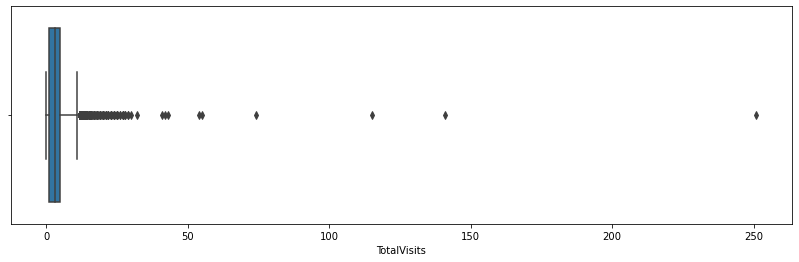

In [879]:
#Finding outliers for TotalVisits
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_data,x="TotalVisits")
plt.show()

In [880]:
#Finding quantile for TotalVisits
leads_data.TotalVisits.quantile([0.01,0.02,0.03,0.05,0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.01     0.0
0.02     0.0
0.03     0.0
0.05     0.0
0.10     0.0
0.25     1.0
0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

##### From above we can say the 99the quantile of the data is under 17. Anything above 17 would be consisered as outliers. 

In [881]:
#Removing outliers from TotalVisits
leads_data=leads_data[~(leads_data["TotalVisits"]>17)]

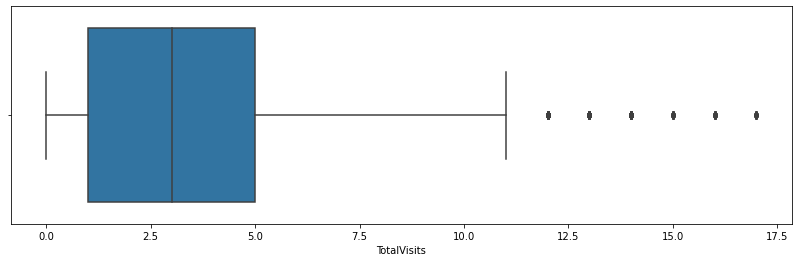

In [882]:
#Again Checking outliers for TotalVisits
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_data,x="TotalVisits")
plt.show()

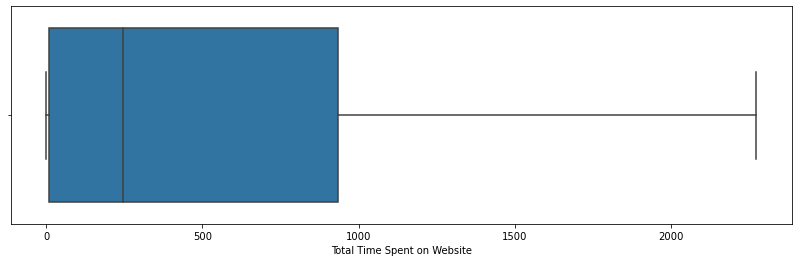

In [883]:
#Finding outliers for Total Time Spent on Website
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_data,x="Total Time Spent on Website")
plt.show()

##### We have not found any outliers in Total Time Spent on Website

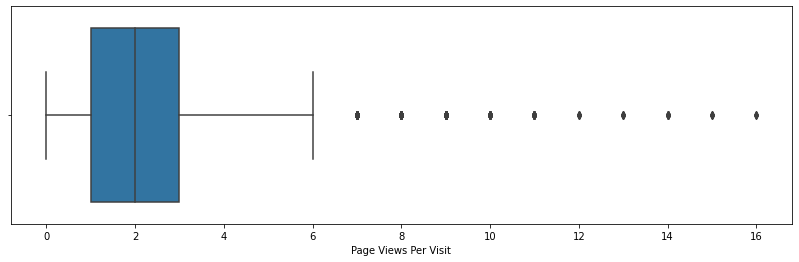

In [884]:
#Finding outliers for Page Views Per Visit
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_data,x="Page Views Per Visit")
plt.show()

In [885]:
#Finding quantile for Page Views Per Visit
leads_data["Page Views Per Visit"].quantile([0.01,0.02,0.03,0.05,0.1,0.25,0.5,0.7,0.9,0.95,0.99])

0.01    0.0
0.02    0.0
0.03    0.0
0.05    0.0
0.10    0.0
0.25    1.0
0.50    2.0
0.70    3.0
0.90    5.0
0.95    6.0
0.99    9.0
Name: Page Views Per Visit, dtype: float64

##### From above we can say the 99the quantile of the data is under 9. Anything above 9 would be consisered as outliers. 

In [886]:
#Removing outliers from Page Views Per Visit
leads_data=leads_data[~(leads_data["Page Views Per Visit"]>9)]

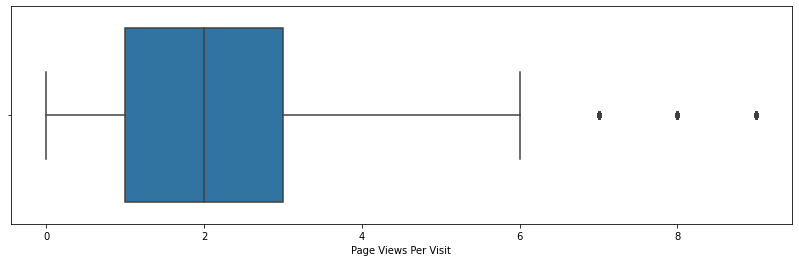

In [887]:
#Again checking outliers for Page Views Per Visit
plt.figure(figsize=[14,4])
sns.boxplot(data=leads_data,x="Page Views Per Visit")
plt.show()

#### Percentage of rows retain after data cleaning and outliers treatment.


In [888]:
orig_num_rows = 9240
rows_retain = 9090

percent_rows_retain = rows_retain / orig_num_rows *100
print(str(round(percent_rows_retain)) + "%")

98%


### Now performing UNIVARIATE/BIVARIATE analysis of our target variable with other categorical variables.

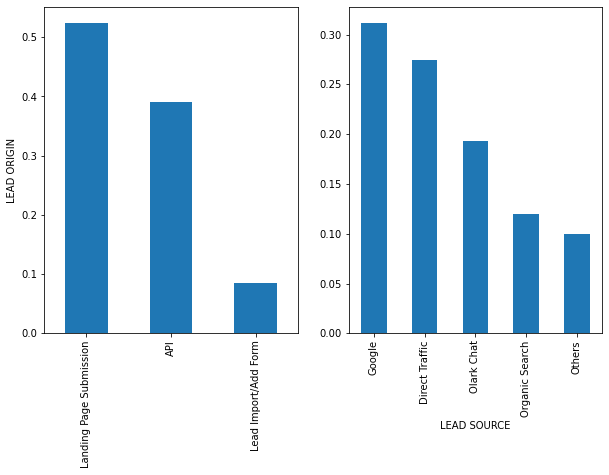

In [889]:
#plot the bar graph of percentage INCOME_GROUP categories in app_data_delay AND app_data_ontime
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
leads_data["Lead Origin New"].value_counts(normalize=True).plot.bar()
plt.ylabel("LEAD ORIGIN")
plt.subplot(1,2,2)
leads_data["Lead Source New"].value_counts(normalize=True).plot.bar()
plt.xlabel("LEAD SOURCE")
plt.show()

### Bivariate and Multivariate Analysis

#### Numeric- numeric analysis 

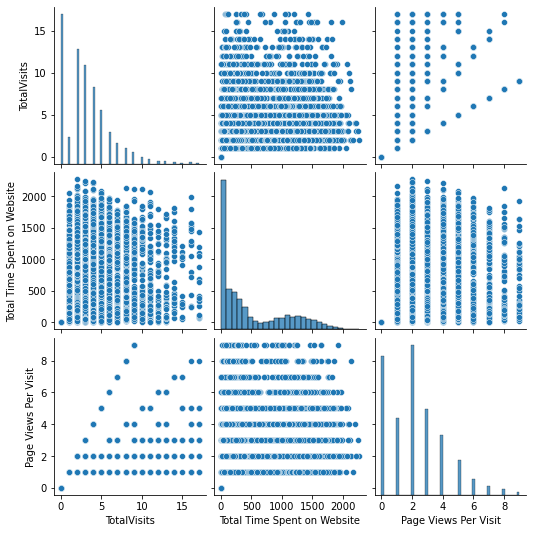

In [890]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=leads_data,vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"])

From above pair plot we are not able to find any conclusive pattern between `"TotalVisits","Total Time Spent on Website","Page Views Per Visit"`.

#### Numerical categorical variable analysis

##### TotalVisits vs Converted

In [891]:
#groupby the Converted to find the mean of the Totalvisits with response 0 & 1 seperatly.
leads_data.groupby("Converted")["TotalVisits"].mean()

Converted
0    3.042181
1    3.298999
Name: TotalVisits, dtype: float64

In [892]:
#groupby the Converted to find the median of the Totalvisits with response 0 & 1 seperatly.
leads_data.groupby("Converted")["TotalVisits"].median()

Converted
0    3
1    3
Name: TotalVisits, dtype: int64

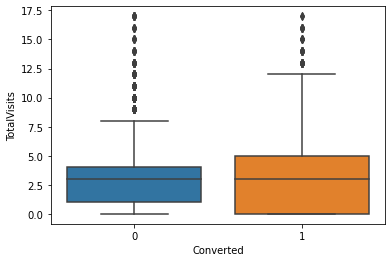

In [893]:
#plot the box plot of TotalVisits for yes & no responses.
sns.boxplot(data=leads_data,x="Converted",y="TotalVisits")
plt.show()

From above box plot of `TotalVisits vs Converted` we can see that mean is almost same for both converted and not converted. 

However, those who were converted have more number range of total visits. It could be one of the key factors in conversion of leads. 

##### Total Time Spent on Website  vs Converted

In [894]:
#groupby the Converted to find the mean of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_data.groupby("Converted")["Total Time Spent on Website"].mean()

Converted
0    328.416979
1    733.700429
Name: Total Time Spent on Website, dtype: float64

In [895]:
#groupby the Converted to find the median of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_data.groupby("Converted")["Total Time Spent on Website"].median()

Converted
0    177
1    829
Name: Total Time Spent on Website, dtype: int64

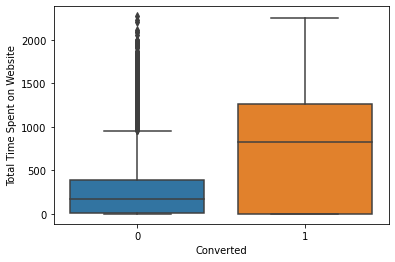

In [896]:
#plot the box plot of Total Time Spent on Website for yes & no responses.
sns.boxplot(data=leads_data,x="Converted",y="Total Time Spent on Website")
plt.show()

From above box plot of `Total Time Spent on Website vs Converted` we can clearly see that those who spent more time on website have higher percentage of conversion rate. 

Definitely we can say if a leads spends moretime on website then higher chances of him to get converted

##### Page Views Per Visit  vs Converted

In [897]:
#groupby the Converted to find the mean of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_data.groupby("Converted")["Page Views Per Visit"].mean()

Converted
0    2.212869
1    2.171388
Name: Page Views Per Visit, dtype: float64

In [898]:
#groupby the Converted to find the median of the Total Time Spent on Website with response 0 & 1 seperatly.
leads_data.groupby("Converted")["Page Views Per Visit"].median()

Converted
0    2
1    2
Name: Page Views Per Visit, dtype: int64

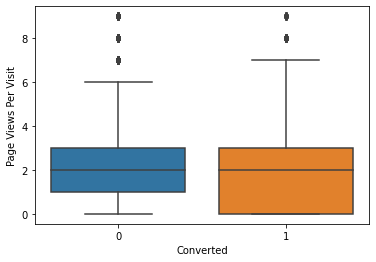

In [899]:
#plot the box plot of Total Time Spent on Website for yes & no responses.
sns.boxplot(data=leads_data,x="Converted",y="Page Views Per Visit")
plt.show()

From above box plot of `Page Views Per Visit vs Converted` we can see that mean is almost same for both converted and not converted. 

We are not able to conclude anything from above plot though we can see converted category covers more ranges of pages views per visit

##### Cateogrical vs categorical 

In [900]:
#calculate the mean of Converted with different Lead Origins.
leads_data.groupby(["Lead Origin New","Converted"])["Converted"].count()/leads_data.groupby("Lead Origin New")["Lead Origin New"].count()*100

Lead Origin New          Converted
API                      0            68.996618
                         1            31.003382
Landing Page Submission  0            63.975676
                         1            36.024324
Lead Import/Add Form     0            12.419146
                         1            87.580854
dtype: float64

In [901]:
leads_data.groupby(["Lead Origin New","Converted"])["Converted"].count()

Lead Origin New          Converted
API                      0            2448
                         1            1100
Landing Page Submission  0            3051
                         1            1718
Lead Import/Add Form     0              96
                         1             677
Name: Converted, dtype: int64

From above stats we can see the customers who got identified as a lead from origin `Lead Import/Add Form(Lead Add Form,Lead Import,Quick Add Form)` have higher chances of getting converted successfully. 

Also, X education should focus on how they can increase the number of customers comes from `Lead Import/Add Form` , so that conversion rate would be increased.

In [902]:
#calculate the mean of Converted with different Lead Sources.
leads_data.groupby(["Lead Source New","Converted"])["Converted"].count()/leads_data.groupby("Lead Source New")["Lead Source New"].count()*100

Lead Source New  Converted
Direct Traffic   0            67.787115
                 1            32.212885
Google           0            60.084626
                 1            39.915374
Olark Chat       0            74.500856
                 1            25.499144
Organic Search   0            63.186813
                 1            36.813187
Others           0            22.087912
                 1            77.912088
dtype: float64

In [903]:
leads_data.groupby(["Lead Source New","Converted"])["Converted"].count()

Lead Source New  Converted
Direct Traffic   0            1694
                 1             805
Google           0            1704
                 1            1132
Olark Chat       0            1306
                 1             447
Organic Search   0             690
                 1             402
Others           0             201
                 1             709
Name: Converted, dtype: int64

From above stats we can see that customers whose source is `Others` they have higher rate of conversion in a lead. However,the number of customers from these source are very less. X education should develop marketing strategies on these platforms so that customer counts should get increased .

##### Next we are plotting the bar plot of target variable `Converted` with all binomial attibutes

In [904]:
binomial_columns =["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]

for x in binomial_columns:
    print("\'"+ x + "\'" + " with mean value of Converted 0 being No 1 being Yes ")    
    print(leads_data.groupby([x,"Converted"])["Converted"].count() /leads_data.groupby(x)[x].count()*100    )
    print(leads_data.groupby([x,"Converted"])["Converted"].count() )
    print("----------------------------------------------------------------------------")

'Do Not Email' with mean value of Converted 0 being No 1 being Yes 
Do Not Email  Converted
No            0            59.668376
              1            40.331624
Yes           0            83.875530
              1            16.124470
dtype: float64
Do Not Email  Converted
No            0            5002
              1            3381
Yes           0             593
              1             114
Name: Converted, dtype: int64
----------------------------------------------------------------------------
'Do Not Call' with mean value of Converted 0 being No 1 being Yes 
Do Not Call  Converted
No           0             61.564701
             1             38.435299
Yes          1            100.000000
dtype: float64
Do Not Call  Converted
No           0            5595
             1            3493
Yes          1               2
Name: Converted, dtype: int64
----------------------------------------------------------------------------
'Search' with mean value of Converted 0 being N

## Step 3 - Data prepartion to build model

#### Converting some binary variables (No/Yes) to 0/1

In [905]:
leads_data[["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Get updates on DM Content","Update me on Supply Chain Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"]]

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,Update me on Supply Chain Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,No,No,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No,No,Yes
3,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Yes,No,No,No,No,No,No,No,No,No,No,No
9236,No,No,No,No,No,No,No,No,No,No,No,Yes
9237,Yes,No,No,No,No,No,No,No,No,No,No,Yes
9238,No,No,No,No,No,No,No,No,No,No,No,No


In [906]:
#Update "Do Not Email" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Do Not Email"]=leads_data["Do Not Email"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Do Not Call" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Do Not Call"]=leads_data["Do Not Call"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Search" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Search"]=leads_data["Search"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Newspaper Article" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Newspaper Article"]=leads_data["Newspaper Article"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "X Education Forums" of numerical data type where response "yes"= 1, "no"= 0
leads_data["X Education Forums"]=leads_data["X Education Forums"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Newspaper" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Newspaper"]=leads_data["Newspaper"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Digital Advertisement" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Digital Advertisement"]=leads_data["Digital Advertisement"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Through Recommendations"]=leads_data["Through Recommendations"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Update me on Supply Chain Content"]=leads_data["Update me on Supply Chain Content"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_data["Get updates on DM Content"]=leads_data["Get updates on DM Content"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_data["I agree to pay the amount through cheque"]=leads_data["I agree to pay the amount through cheque"].apply(lambda x : 1 if x =="Yes" else 0)

#Update "Through Recommendations" of numerical data type where response "yes"= 1, "no"= 0
leads_data["A free copy of Mastering The Interview"]=leads_data["A free copy of Mastering The Interview"].apply(lambda x : 1 if x =="Yes" else 0)


In [907]:
leads_data[["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]]

,Do Not Email,Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,0
9238,0,0,0,0,0,0,0,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [908]:
# Creating dummy variables for the variable 'Lead Origin'
LeadOrigin = pd.get_dummies(leads_data['Lead Origin New'], prefix='Lead_Origin',drop_first=True)
leads_data = pd.concat([leads_data,LeadOrigin], axis=1)

# Creating dummy variables for the variable 'Lead Origin'
LeadSource = pd.get_dummies(leads_data['Lead Source New'], prefix='Lead_Source',drop_first=True)
leads_data = pd.concat([leads_data,LeadSource], axis=1)

leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,...,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin New,Lead Source New,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import/Add Form,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,...,0,0,API,Olark Chat,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5,674,2,0,0,...,0,0,API,Organic Search,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2,0,0,...,0,1,Landing Page Submission,Direct Traffic,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1,0,0,...,0,0,Landing Page Submission,Direct Traffic,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2,1428,1,0,0,...,0,0,Landing Page Submission,Google,1,0,1,0,0,0


#### Dropping the repeated variables

In [909]:
# We have created dummies for the below variables, so we can drop them
leads_data = leads_data.drop(["Lead Origin New","Lead Source New"], 1)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9090 non-null   object
 1   Lead Number                               9090 non-null   int64 
 2   Do Not Email                              9090 non-null   int64 
 3   Do Not Call                               9090 non-null   int64 
 4   Converted                                 9090 non-null   int64 
 5   TotalVisits                               9090 non-null   int64 
 6   Total Time Spent on Website               9090 non-null   int64 
 7   Page Views Per Visit                      9090 non-null   int64 
 8   Search                                    9090 non-null   int64 
 9   Newspaper Article                         9090 non-null   int64 
 10  X Education Forums                        9090 n

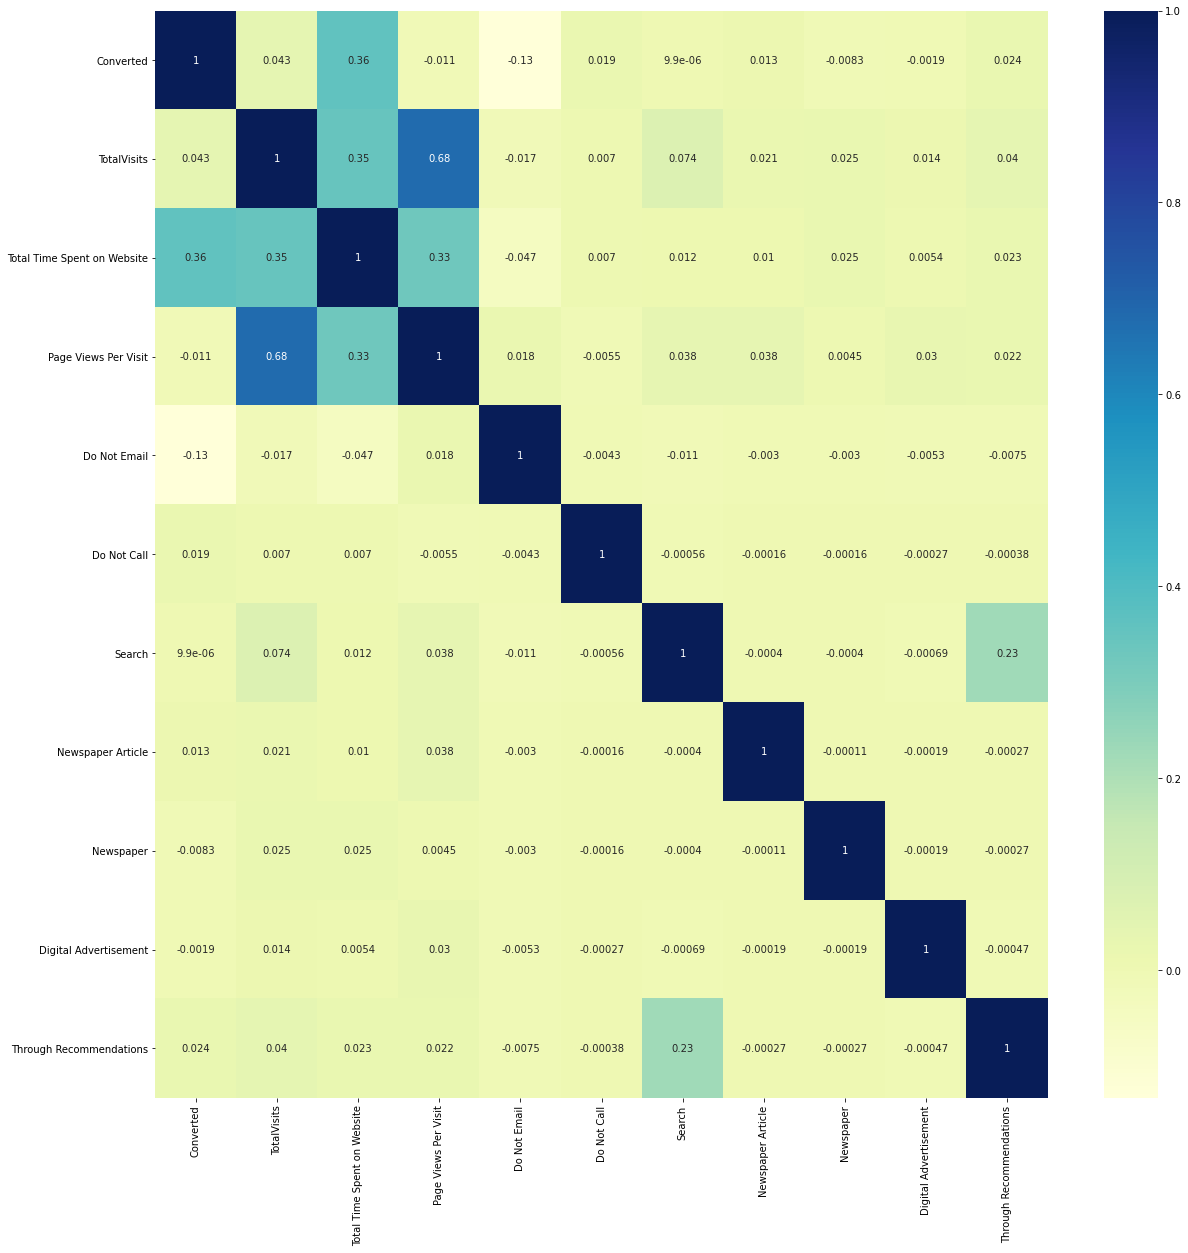

In [910]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(leads_data[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit","Do Not Email","Do Not Call","Search","Newspaper Article","Newspaper","Digital Advertisement","Through Recommendations"]].corr(), annot = True, cmap="YlGnBu")
plt.show()

From above correaltion matrix we can see there is high collinearity between variables `TotalVisits` and `Page Views Per Visit`

## Step 4 - Test-Train Split

In [911]:
from sklearn.model_selection import train_test_split

In [912]:
# Putting feature variable to X
X = leads_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import/Add Form,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2,1532,2,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,1,305,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,2,1428,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [913]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [914]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [915]:
from sklearn.preprocessing import MinMaxScaler

In [916]:
#Scaling done for Continuous variable
scaler = MinMaxScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import/Add Form,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
302,0,0,0.411765,0.110035,0.222222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,1,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,0,0.294118,0.206866,0.555556,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7656,1,0,0.352941,0.154930,0.666667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3241,0,0,0.235294,0.428257,0.111111,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


## Step 5 - Model building

In [917]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [918]:
logreg = LogisticRegression()

In [919]:
# running RFE with 18 variables as output
rfe = RFE(logreg, 18)             
rfe = rfe.fit(X_train, y_train)

In [920]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [921]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Newspaper Article', True, 1),
 ('X Education Forums', False, 4),
 ('Newspaper', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('Update me on Supply Chain Content', False, 3),
 ('Get updates on DM Content', False, 2),
 ('I agree to pay the amount through cheque', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Import/Add Form', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Others', True, 1)]

In [922]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [923]:
X_train.columns[~rfe.support_]

Index(['X Education Forums', 'Update me on Supply Chain Content',
       'Get updates on DM Content'],
      dtype='object')

##### Assessing the model with StatsModels

In [924]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3240.2
Date:                Mon, 14 Jun 2021   Deviance:                       6480.3
Time:                        19:23:00   Pearson chi2:                 6.84e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3218      0.128    -18.083      0.000      -2.574      -2.070
Do Not Email                                -1.2609      0.148     -8.541      0.000      -1.550      -0.972
Do Not Call                                 20.9685    3.4e+04      0.001      1.000   -6.65e+04    6.66e+04
TotalVisits                                  1.0112      0.248      4.085      0.000       0.526       1.496
Total Time Spent on Website                  4.5264      0.152     29.695      0.000       4.228       4.825
Page Views Per Visit                        -0.1560      0.224     -0.698      0.485      -0.594       0.282
Search                                      -0.0421      0.890     -0.047      0.962      -1.786       1.702
Newspaper Article                           22.2057   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Newspaper                                  -24.5784   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement                       -0.2565      1.442     -0.178      0.859      -3.084       2.571
Through Recommendations                     21.8684   2.67e+04      0.001      0.999   -5.22e+04    5.23e+04
I agree to pay the amount through cheque -6.996e-11   5.25e-07     -0.000      1.000   -1.03e-06    1.03e-06
A free copy of Mastering The Interview      -0.0276      0.096     -0.288      0.773      -0.215       0.160
Lead_Origin_Landing Page Submission          0.1813      0.095      1.917      0.055      -0.004       0.367
Lead_Origin_Lead Import/Add Form             4.1756      0.301     13.858      0.000       3.585       4.766
Lead_Source_Google                           0.2954      0.102      2.895      0.004       0.095       0.495
Lead_Source_Olark Chat                       1.0917      0.142      7.667      0.000       0.813       1.371
Lead_Source_Organic Search                   0.1193      0.116      1.025      0.306      -0.109       0.348
Lead_Source_Others                          -0.0415      0.272     -0.152      0.879      -0.575       0.492
============================================================================================================
"""

From above we can see `Do Not Call` has high  p-value . So we will be droppping that column.

In [925]:
col=col.drop("Do Not Call",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper Article', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [926]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3240.5
Date:                Mon, 14 Jun 2021   Deviance:                       6481.1
Time:                        19:23:01   Pearson chi2:                 6.85e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3219      0.128    -18.082      0.000      -2.574      -2.070
Do Not Email                                -1.2613      0.148     -8.542      0.000      -1.551      -0.972
TotalVisits                                  1.0145      0.247      4.100      0.000       0.530       1.500
Total Time Spent on Website                  4.5279      0.152     29.706      0.000       4.229       4.827
Page Views Per Visit                        -0.1566      0.224     -0.700      0.484      -0.595       0.282
Search                                      -0.0426      0.890     -0.048      0.962      -1.786       1.701
Newspaper Article                           21.2055   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Newspaper                                  -23.5802   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                       -0.2566      1.442     -0.178      0.859      -3.084       2.571
Through Recommendations                     20.8676   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
I agree to pay the amount through cheque -2.005e-10   2.39e-07     -0.001      0.999   -4.69e-07    4.69e-07
A free copy of Mastering The Interview      -0.0276      0.096     -0.288      0.773      -0.215       0.160
Lead_Origin_Landing Page Submission          0.1803      0.095      1.907      0.057      -0.005       0.366
Lead_Origin_Lead Import/Add Form             4.1789      0.301     13.869      0.000       3.588       4.769
Lead_Source_Google                           0.2955      0.102      2.896      0.004       0.096       0.495
Lead_Source_Olark Chat                       1.0916      0.142      7.666      0.000       0.813       1.371
Lead_Source_Organic Search                   0.1187      0.116      1.020      0.308      -0.110       0.347
Lead_Source_Others                          -0.0423      0.272     -0.155      0.877      -0.576       0.491
============================================================================================================
"""

From above we can see `Newspaper Article` has high  p-value . So we will be droppping that column.

In [927]:
col=col.drop("Newspaper Article",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [928]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3241.1
Date:                Mon, 14 Jun 2021   Deviance:                       6482.1
Time:                        19:23:01   Pearson chi2:                 6.85e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3241      0.128    -18.102      0.000      -2.576      -2.072
Do Not Email                                -1.2620      0.148     -8.547      0.000      -1.551      -0.973
TotalVisits                                  1.0149      0.247      4.101      0.000       0.530       1.500
Total Time Spent on Website                  4.5292      0.152     29.712      0.000       4.230       4.828
Page Views Per Visit                        -0.1473      0.223     -0.660      0.509      -0.585       0.290
Search                                      -0.0466      0.890     -0.052      0.958      -1.791       1.697
Newspaper                                  -23.5832   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                       -0.2613      1.442     -0.181      0.856      -3.087       2.565
Through Recommendations                     20.8641   1.62e+04      0.001      0.999   -3.16e+04    3.17e+04
I agree to pay the amount through cheque  2.158e-11   1.48e-08      0.001      0.999    -2.9e-08     2.9e-08
A free copy of Mastering The Interview      -0.0299      0.096     -0.313      0.755      -0.217       0.157
Lead_Origin_Landing Page Submission          0.1811      0.095      1.916      0.055      -0.004       0.366
Lead_Origin_Lead Import/Add Form             4.1826      0.301     13.880      0.000       3.592       4.773
Lead_Source_Google                           0.2940      0.102      2.882      0.004       0.094       0.494
Lead_Source_Olark Chat                       1.0937      0.142      7.682      0.000       0.815       1.373
Lead_Source_Organic Search                   0.1204      0.116      1.034      0.301      -0.108       0.349
Lead_Source_Others                          -0.0438      0.272     -0.161      0.872      -0.577       0.490
============================================================================================================
"""

From above we can see `Newspaper` has high  p-value . So we will be droppping that column.

In [929]:
col=col.drop("Newspaper",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [930]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3243.2
Date:                Mon, 14 Jun 2021   Deviance:                       6486.4
Time:                        19:23:01   Pearson chi2:                 6.85e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3251      0.128    -18.115      0.000      -2.577      -2.074
Do Not Email                                -1.2602      0.148     -8.537      0.000      -1.549      -0.971
TotalVisits                                  0.9951      0.247      4.025      0.000       0.511       1.480
Total Time Spent on Website                  4.5194      0.152     29.681      0.000       4.221       4.818
Page Views Per Visit                        -0.1413      0.223     -0.633      0.527      -0.579       0.296
Search                                      -0.0390      0.890     -0.044      0.965      -1.783       1.705
Digital Advertisement                       -0.2520      1.441     -0.175      0.861      -3.077       2.573
Through Recommendations                     20.8733   1.61e+04      0.001      0.999   -3.16e+04    3.17e+04
I agree to pay the amount through cheque  8.682e-11   6.72e-08      0.001      0.999   -1.32e-07    1.32e-07
A free copy of Mastering The Interview      -0.0226      0.096     -0.237      0.813      -0.210       0.165
Lead_Origin_Landing Page Submission          0.1790      0.095      1.894      0.058      -0.006       0.364
Lead_Origin_Lead Import/Add Form             4.1771      0.301     13.868      0.000       3.587       4.767
Lead_Source_Google                           0.3015      0.102      2.957      0.003       0.102       0.501
Lead_Source_Olark Chat                       1.0950      0.142      7.693      0.000       0.816       1.374
Lead_Source_Organic Search                   0.1259      0.116      1.082      0.279      -0.102       0.354
Lead_Source_Others                          -0.0372      0.272     -0.137      0.891      -0.571       0.496
============================================================================================================
"""

From above we can see `Through Recommendations` has high  p-value . So we will be droppping that column.

In [931]:
col=col.drop("Through Recommendations",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Digital Advertisement',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [932]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.4
Date:                Mon, 14 Jun 2021   Deviance:                       6488.9
Time:                        19:23:02   Pearson chi2:                 6.86e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3260      0.128    -18.140      0.000      -2.577      -2.075
Do Not Email                                -1.2616      0.148     -8.546      0.000      -1.551      -0.972
TotalVisits                                  1.0053      0.247      4.069      0.000       0.521       1.490
Total Time Spent on Website                  4.5232      0.152     29.708      0.000       4.225       4.822
Page Views Per Visit                        -0.1399      0.223     -0.628      0.530      -0.577       0.297
Search                                      -0.0444      0.890     -0.050      0.960      -1.788       1.700
Digital Advertisement                       -0.2584      1.441     -0.179      0.858      -3.083       2.566
I agree to pay the amount through cheque   3.25e-17   2.16e-15      0.015      0.988    -4.2e-15    4.27e-15
A free copy of Mastering The Interview      -0.0264      0.095     -0.277      0.782      -0.214       0.161
Lead_Origin_Landing Page Submission          0.1810      0.095      1.915      0.056      -0.004       0.366
Lead_Origin_Lead Import/Add Form             4.1814      0.301     13.881      0.000       3.591       4.772
Lead_Source_Google                           0.2982      0.102      2.927      0.003       0.099       0.498
Lead_Source_Olark Chat                       1.0958      0.142      7.704      0.000       0.817       1.375
Lead_Source_Organic Search                   0.1243      0.116      1.069      0.285      -0.104       0.352
Lead_Source_Others                          -0.0407      0.272     -0.149      0.881      -0.574       0.493
============================================================================================================
"""

From above we can see `I agree to pay the amount through cheque` has high  p-value . So we will be droppping that column.

In [933]:
col=col.drop("I agree to pay the amount through cheque",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Digital Advertisement',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [934]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.4
Date:                Mon, 14 Jun 2021   Deviance:                       6488.9
Time:                        19:23:02   Pearson chi2:                 6.86e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3260      0.128    -18.140      0.000      -2.577      -2.075
Do Not Email                              -1.2616      0.148     -8.546      0.000      -1.551      -0.972
TotalVisits                                1.0053      0.247      4.069      0.000       0.521       1.490
Total Time Spent on Website                4.5232      0.152     29.708      0.000       4.225       4.822
Page Views Per Visit                      -0.1399      0.223     -0.628      0.530      -0.577       0.297
Search                                    -0.0444      0.890     -0.050      0.960      -1.788       1.700
Digital Advertisement                     -0.2584      1.441     -0.179      0.858      -3.083       2.566
A free copy of Mastering The Interview    -0.0264      0.095     -0.277      0.782      -0.214       0.161
Lead_Origin_Landing Page Submission        0.1810      0.095      1.915      0.056      -0.004       0.366
Lead_Origin_Lead Import/Add Form           4.1814      0.301     13.881      0.000       3.591       4.772
Lead_Source_Google                         0.2982      0.102      2.927      0.003       0.099       0.498
Lead_Source_Olark Chat                     1.0958      0.142      7.704      0.000       0.817       1.375
Lead_Source_Organic Search                 0.1243      0.116      1.069      0.285      -0.104       0.352
Lead_Source_Others                        -0.0407      0.272     -0.149      0.881      -0.574       0.493
==========================================================================================================
"""

From above we can see `Search` has high  p-value . So we will be droppping that column.

In [935]:
col=col.drop("Search",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Digital Advertisement',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [936]:
#re-assessing the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.4
Date:                Mon, 14 Jun 2021   Deviance:                       6488.9
Time:                        19:23:02   Pearson chi2:                 6.86e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3261      0.128    -18.141      0.000      -2.577      -2.075
Do Not Email                              -1.2615      0.148     -8.546      0.000      -1.551      -0.972
TotalVisits                                1.0048      0.247      4.070      0.000       0.521       1.489
Total Time Spent on Website                4.5231      0.152     29.710      0.000       4.225       4.821
Page Views Per Visit                      -0.1399      0.223     -0.628      0.530      -0.576       0.297
Digital Advertisement                     -0.2580      1.441     -0.179      0.858      -3.083       2.567
A free copy of Mastering The Interview    -0.0262      0.095     -0.275      0.783      -0.213       0.161
Lead_Origin_Landing Page Submission        0.1809      0.094      1.914      0.056      -0.004       0.366
Lead_Origin_Lead Import/Add Form           4.1813      0.301     13.882      0.000       3.591       4.772
Lead_Source_Google                         0.2984      0.102      2.932      0.003       0.099       0.498
Lead_Source_Olark Chat                     1.0958      0.142      7.704      0.000       0.817       1.375
Lead_Source_Organic Search                 0.1241      0.116      1.068      0.286      -0.104       0.352
Lead_Source_Others                        -0.0405      0.272     -0.149      0.882      -0.574       0.493
==========================================================================================================
"""

From above we can see `Page Views Per Visit` has high  p-value . So we will be droppping that column.

In [937]:
col=col.drop("Page Views Per Visit",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Digital Advertisement', 'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [938]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.6
Date:                Mon, 14 Jun 2021   Deviance:                       6489.3
Time:                        19:23:02   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3426      0.126    -18.661      0.000      -2.589      -2.097
Do Not Email                              -1.2608      0.148     -8.541      0.000      -1.550      -0.972
TotalVisits                                0.9439      0.227      4.157      0.000       0.499       1.389
Total Time Spent on Website                4.5235      0.152     29.709      0.000       4.225       4.822
Digital Advertisement                     -0.2912      1.433     -0.203      0.839      -3.099       2.517
A free copy of Mastering The Interview    -0.0240      0.095     -0.252      0.801      -0.211       0.163
Lead_Origin_Landing Page Submission        0.1671      0.092      1.819      0.069      -0.013       0.347
Lead_Origin_Lead Import/Add Form           4.2101      0.298     14.127      0.000       3.626       4.794
Lead_Source_Google                         0.2931      0.101      2.891      0.004       0.094       0.492
Lead_Source_Olark Chat                     1.1113      0.140      7.931      0.000       0.837       1.386
Lead_Source_Organic Search                 0.1098      0.114      0.964      0.335      -0.114       0.333
Lead_Source_Others                        -0.0544      0.272     -0.200      0.841      -0.587       0.478
==========================================================================================================
"""

From above we can see `Digital Advertisement` has high  p-value . So we will be droppping that column.

In [939]:
col=col.drop("Digital Advertisement",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [940]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.7
Date:                Mon, 14 Jun 2021   Deviance:                       6489.3
Time:                        19:23:03   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3434      0.125    -18.676      0.000      -2.589      -2.097
Do Not Email                              -1.2606      0.148     -8.539      0.000      -1.550      -0.971
TotalVisits                                0.9431      0.227      4.154      0.000       0.498       1.388
Total Time Spent on Website                4.5234      0.152     29.709      0.000       4.225       4.822
A free copy of Mastering The Interview    -0.0229      0.095     -0.241      0.809      -0.209       0.163
Lead_Origin_Landing Page Submission        0.1668      0.092      1.815      0.069      -0.013       0.347
Lead_Origin_Lead Import/Add Form           4.2099      0.298     14.126      0.000       3.626       4.794
Lead_Source_Google                         0.2943      0.101      2.907      0.004       0.096       0.493
Lead_Source_Olark Chat                     1.1121      0.140      7.940      0.000       0.838       1.387
Lead_Source_Organic Search                 0.1106      0.114      0.971      0.332      -0.113       0.334
Lead_Source_Others                        -0.0535      0.272     -0.197      0.844      -0.586       0.479
==========================================================================================================
"""

From above we can see `A free copy of Mastering The Interview` has high  p-value . So we will be droppping that column.

In [941]:
col=col.drop("A free copy of Mastering The Interview",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Others'],
      dtype='object')

In [942]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.7
Date:                Mon, 14 Jun 2021   Deviance:                       6489.4
Time:                        19:23:03   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3530      0.119    -19.783      0.000      -2.586      -2.120
Do Not Email                           -1.2593      0.148     -8.537      0.000      -1.548      -0.970
TotalVisits                             0.9379      0.226      4.150      0.000       0.495       1.381
Total Time Spent on Website             4.5224      0.152     29.714      0.000       4.224       4.821
Lead_Origin_Landing Page Submission     0.1600      0.087      1.829      0.067      -0.011       0.331
Lead_Origin_Lead Import/Add Form        4.2100      0.298     14.124      0.000       3.626       4.794
Lead_Source_Google                      0.3075      0.085      3.616      0.000       0.141       0.474
Lead_Source_Olark Chat                  1.1210      0.135      8.297      0.000       0.856       1.386
Lead_Source_Organic Search              0.1152      0.112      1.026      0.305      -0.105       0.335
Lead_Source_Others                     -0.0442      0.269     -0.164      0.869      -0.571       0.483
=======================================================================================================
"""

From above we can see `Lead_Source_Others` has high  p-value . So we will be droppping that column.

In [943]:
col=col.drop("Lead_Source_Others",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search'],
      dtype='object')

In [944]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3244.7
Date:                Mon, 14 Jun 2021   Deviance:                       6489.4
Time:                        19:23:03   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3577      0.116    -20.403      0.000      -2.584      -2.131
Do Not Email                           -1.2589      0.147     -8.535      0.000      -1.548      -0.970
TotalVisits                             0.9348      0.225      4.151      0.000       0.493       1.376
Total Time Spent on Website             4.5229      0.152     29.722      0.000       4.225       4.821
Lead_Origin_Landing Page Submission     0.1631      0.085      1.910      0.056      -0.004       0.331
Lead_Origin_Lead Import/Add Form        4.1705      0.176     23.763      0.000       3.826       4.514
Lead_Source_Google                      0.3109      0.083      3.762      0.000       0.149       0.473
Lead_Source_Olark Chat                  1.1257      0.132      8.522      0.000       0.867       1.385
Lead_Source_Organic Search              0.1188      0.110      1.078      0.281      -0.097       0.335
=======================================================================================================
"""

#### Checking VIFs

In [945]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [946]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.22
3,Lead_Origin_Landing Page Submission,2.50
2,Total Time Spent on Website,2.07
5,Lead_Source_Google,1.66
7,Lead_Source_Organic Search,1.39
0,Do Not Email,1.09
4,Lead_Origin_Lead Import/Add Form,1.02
6,Lead_Source_Olark Chat,1.01


From above we can see `Lead_Source_Organic Search` has high  p-value . So we will be droppping that column.

In [947]:
col=col.drop("Lead_Source_Organic Search",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [948]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3245.3
Date:                Mon, 14 Jun 2021   Deviance:                       6490.6
Time:                        19:23:04   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.3136      0.108    -21.449      0.000      -2.525      -2.102
Do Not Email                           -1.2566      0.147     -8.524      0.000      -1.546      -0.968
TotalVisits                             0.9864      0.220      4.481      0.000       0.555       1.418
Total Time Spent on Website             4.5221      0.152     29.717      0.000       4.224       4.820
Lead_Origin_Landing Page Submission     0.1378      0.082      1.678      0.093      -0.023       0.299
Lead_Origin_Lead Import/Add Form        4.1254      0.170     24.220      0.000       3.792       4.459
Lead_Source_Google                      0.2698      0.073      3.685      0.000       0.126       0.413
Lead_Source_Olark Chat                  1.0805      0.125      8.636      0.000       0.835       1.326
=======================================================================================================
"""

From above we can see `Lead_Origin_Landing Page Submission` has high p-value . So we will be droppping that column.

In [949]:
col=col.drop("Lead_Origin_Landing Page Submission",1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_Origin_Lead Import/Add Form', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [950]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3246.7
Date:                Mon, 14 Jun 2021   Deviance:                       6493.4
Time:                        19:23:04   Pearson chi2:                 6.87e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.2105      0.088    -25.100      0.000      -2.383      -2.038
Do Not Email                        -1.2486      0.147     -8.470      0.000      -1.538      -0.960
TotalVisits                          1.0217      0.219      4.664      0.000       0.592       1.451
Total Time Spent on Website          4.5240      0.152     29.738      0.000       4.226       4.822
Lead_Origin_Lead Import/Add Form     4.0211      0.158     25.411      0.000       3.711       4.331
Lead_Source_Google                   0.2411      0.071      3.388      0.001       0.102       0.381
Lead_Source_Olark Chat               0.9765      0.108      9.022      0.000       0.764       1.189
====================================================================================================
"""

#### Checking VIFs

In [951]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.02
2,Total Time Spent on Website,1.90
4,Lead_Source_Google,1.49
0,Do Not Email,1.05
3,Lead_Origin_Lead Import/Add Form,1.01
5,Lead_Source_Olark Chat,1.01


We can seen there is no significant collinearity among the final list of features.

In [952]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

302     0.215513
6087    0.077087
1033    0.324537
7656    0.083354
3241    0.491831
5738    0.116643
7366    0.225484
3680    0.146864
4170    0.469963
43      0.226739
dtype: float64

In [953]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21551343, 0.07708683, 0.32453663, 0.08335428, 0.49183104,
       0.11664347, 0.22548416, 0.14686406, 0.46996338, 0.22673902])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [954]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadNumber'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber
0,0,0.215513,302
1,0,0.077087,6087
2,0,0.324537,1033
3,0,0.083354,7656
4,1,0.491831,3241


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [955]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted
0,0,0.215513,302,0
1,0,0.077087,6087,0
2,0,0.324537,1033,0
3,0,0.083354,7656,0
4,1,0.491831,3241,0


#### Matrix evaulation on train set

In [956]:
from sklearn import metrics

In [957]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3435  500]
 [ 939 1489]]


In [958]:
# Actual/Predicted           not_converted    converted
        # not_converted          3435            500
        # converted              939            1489  

In [959]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7738488134527739


### Matrix beyond simply accuracy

In [960]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [961]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6132619439868204

In [962]:
# Let us calculate specificity
TN / float(TN+FP)

0.8729351969504447

In [963]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.12706480304955528


In [964]:
# positive predictive value 
print (TP / float(TP+FP))

0.7486173956762192


In [965]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7853223593964335


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

In [966]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [967]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

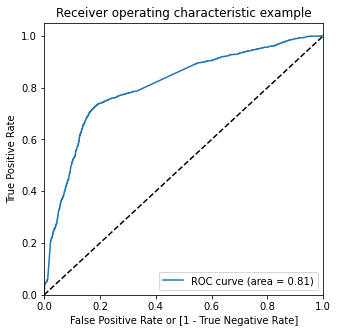

In [968]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [969]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.215513,302,0,1,1,1,0,0,0,0,0,0,0
1,0,0.077087,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.324537,1033,0,1,1,1,1,0,0,0,0,0,0
3,0,0.083354,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.491831,3241,0,1,1,1,1,1,0,0,0,0,0


In [970]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381581  1.000000  0.000000
0.1   0.1  0.428571  0.992586  0.080559
0.2   0.2  0.583215  0.913097  0.379670
0.3   0.3  0.773063  0.743822  0.791105
0.4   0.4  0.785321  0.691928  0.842948
0.5   0.5  0.773849  0.613262  0.872935
0.6   0.6  0.750747  0.506590  0.901398
0.7   0.7  0.720101  0.372323  0.934689
0.8   0.8  0.693226  0.254119  0.964168
0.9   0.9  0.633192  0.047776  0.994409


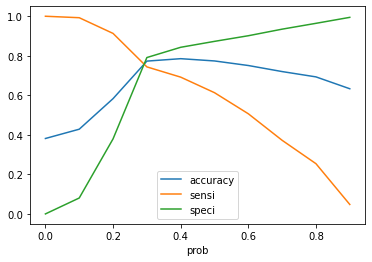

In [971]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [972]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.215513,302,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.077087,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.324537,1033,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.083354,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.491831,3241,0,1,1,1,1,1,0,0,0,0,0,1


In [973]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7636335062077636

In [974]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3029,  906],
       [ 598, 1830]], dtype=int64)

In [975]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [976]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7537067545304778

In [977]:
# Let us calculate specificity
TN / float(TN+FP)

0.7697585768742058

In [978]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.23024142312579415


In [979]:
# Positive predictive value 
print (TP / float(TP+FP))

0.668859649122807


In [980]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8351254480286738


### Precision and Recall

In [981]:
#Looking at the confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

array([[3435,  500],
       [ 939, 1489]], dtype=int64)

##### Precision
TP / TP + FP

In [982]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.7486173956762192

##### Recall
TP / TP + FN

In [983]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.6132619439868204

### Precision and recall tradeoff

In [984]:
from sklearn.metrics import precision_recall_curve

In [985]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: Converted, Length: 6363, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6358    0
 6359    1
 6360    1
 6361    1
 6362    0
 Name: predicted, Length: 6363, dtype: int64)

In [986]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

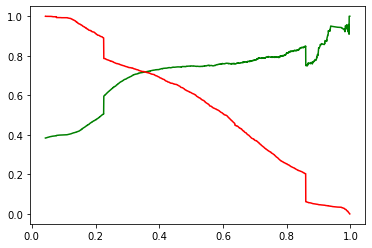

In [987]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 ## Step 6 - Model prediction and evaluation on test set

In [988]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import/Add Form,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
302,0,0,0.411765,0.110035,0.222222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6087,1,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1033,0,0,0.294118,0.206866,0.555556,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7656,1,0,0.352941,0.154930,0.666667,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3241,0,0,0.235294,0.428257,0.111111,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [989]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead_Origin_Lead Import/Add Form,Lead_Source_Google,Lead_Source_Olark Chat
6906,0,0.235294,0.673415,0,0,0
1873,0,0.117647,0.081866,0,1,0
771,0,0.411765,0.021567,0,1,0
4495,0,0.235294,0.063380,0,1,0
9061,0,0.117647,0.786972,0,0,0


In [990]:
X_test_sm = sm.add_constant(X_test)

##### Making predictions on the test set

In [991]:
y_test_pred = res.predict(X_test_sm)

In [992]:
y_test_pred[:10]

6906    0.745815
1873    0.185608
771     0.189834
4495    0.191200
9061    0.813048
4929    0.726318
2308    0.213589
1034    0.139279
9033    0.146845
7008    0.750554
dtype: float64

In [993]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [994]:
# Let's see the head
y_pred_1.head()

,0
6906,0.745815
1873,0.185608
771,0.189834
4495,0.191200
9061,0.813048


In [995]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
6906,1
1873,0
771,0
4495,0
9061,1


In [996]:
# Putting LeadNumber to index
y_test_df['LeadNumber'] = y_test_df.index

In [997]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [998]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [999]:
y_pred_final.head()

,Converted,LeadNumber,0
0,1,6906,0.745815
1,0,1873,0.185608
2,0,771,0.189834
3,0,4495,0.191200
4,1,9061,0.813048


In [1000]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1001]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadNumber','Converted','Converted_Prob'], axis=1)

In [1002]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadNumber,Converted,Converted_Prob
0,6906,1,0.745815
1,1873,0,0.185608
2,771,0,0.189834
3,4495,0,0.191200
4,9061,1,0.813048


In [1003]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1004]:
y_pred_final.head()

,LeadNumber,Converted,Converted_Prob,final_predicted
0,6906,1,0.745815,1
1,1873,0,0.185608,0
2,771,0,0.189834,0
3,4495,0,0.191200,0
4,9061,1,0.813048,1


In [1005]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7821782178217822

In [1006]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1372,  288],
       [ 306,  761]], dtype=int64)

In [1007]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [1008]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7132146204311153

In [1009]:
# Let us calculate specificity
TN / float(TN+FP)

0.8265060240963855

### Calculating Lead score on test data set

In [1010]:
y_pred_final["LeadScore"]=y_pred_final.Converted_Prob.apply(lambda x: round(x*100,2) )
y_pred_final.head(10)

,LeadNumber,Converted,Converted_Prob,final_predicted,LeadScore
0,6906,1,0.745815,1,74.58
1,1873,0,0.185608,0,18.56
2,771,0,0.189834,0,18.98
3,4495,0,0.191200,0,19.12
4,9061,1,0.813048,1,81.30
5,4929,1,0.726318,1,72.63
6,2308,0,0.213589,0,21.36
7,1034,0,0.139279,0,13.93
8,9033,0,0.146845,0,14.68
9,7008,1,0.750554,1,75.06
